In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(city_data, ride_data, how="left", on=["city", "city"])
# Display the data table for preview
pyber_data.head()



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [8]:
city_avg_fare = pyber_data.groupby("city")["fare"].mean()

city_total_rides = pyber_data.groupby("city")["ride_id"].count()

city_total_drivers = pyber_data.groupby("city")["driver_count"].first()

city_type = pyber_data.groupby("city")["type"].first()

pyber_df = pd.DataFrame({"Average Fare":city_avg_fare,
                         "Total Rides":city_total_rides,
                         "Total Drivers":city_total_drivers,
                         "Type":city_type
                       })
pyber_df.head()




,Average Fare,Total Rides,Total Drivers,Type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

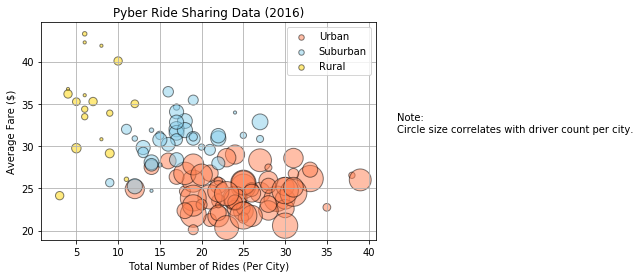

<Figure size 432x288 with 0 Axes>

In [24]:
pyber_type_df = pyber_df.groupby("Type")

urban_grp_df = pyber_type_df.get_group("Urban")

suburban_grp_df = pyber_type_df.get_group("Suburban")

rural_grp_df = pyber_type_df.get_group("Rural")

urban_plt = plt.scatter(x=urban_grp_df["Total Rides"], 
                        y=urban_grp_df["Average Fare"], 
                        s=urban_grp_df["Total Drivers"]*10, 
                        color="coral", 
                        edgecolor = "black", 
                        alpha = .5, 
                        label = "Urban" )

suburban_plt = plt.scatter(x=suburban_grp_df["Total Rides"], 
                           y=suburban_grp_df["Average Fare"], 
                           s=suburban_grp_df["Total Drivers"]*10, 
                           color="skyblue", 
                           edgecolor = "black", 
                           alpha = .5, 
                           label = "Suburban")

rural_plt = plt.scatter(x=rural_grp_df["Total Rides"], 
                        y=rural_grp_df["Average Fare"], 
                        s=rural_grp_df["Total Drivers"]*10, 
                        color="gold", 
                        edgecolor = "black", 
                        alpha = .5, 
                        label = "Rural")





# pyber_colors = np.where(pyber_df["Type"]=="Urban", 'coral',
#               (np.where(pyber_df["Type"]=="Suburban", "skyblue", "gold")))

lgnd = plt.legend(loc="best", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.figtext(x=.95, y=.5, s="Note:\nCircle size correlates with driver count per city.")

plt.grid()
plt.show()
plt.tight_layout()


# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [ ]:
# Show plot


## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()